In [1]:
# imports
from nn import *
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Autoencoder

In [2]:
# Generate an instance of the NeuralNetwork class for the 64x16x64 autoencoder
network = nn.NeuralNetwork([{"input_dim": 64, "output_dim": 16, "activation": "relu"},
                            {"input_dim": 16, "output_dim": 64, "activation": "relu"}], 
                            lr = 0.0001, seed = 26, batch_size = 150, epochs =1000, loss_function = "mse")

In [3]:
# Read in digits dataset from sklearn
digits = load_digits()

In [4]:
# Split the digits dataset into a train and validation set
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                digits.target,
                                                test_size = 0.2,
                                                shuffle=True,
                                                random_state = 26)

In [5]:
# train autoencoder on the train split of the digits dataset 
per_epoch_loss_train, per_epoch_loss_val = network.fit(X_train, X_train, X_test, X_test)

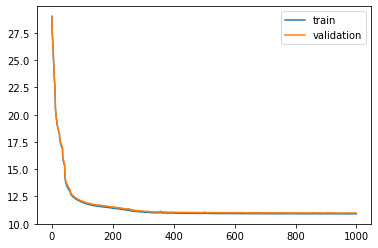

In [6]:
plt.plot(per_epoch_loss_train, label='train')
plt.plot(per_epoch_loss_val, label='validation')
plt.legend()

### hyperparameters

* learning rate: the step size for each iteration that optimally moves toward a minimum of a loss function (gradient).


* batch_size: the number of samples that will propagate through the network.


* epochs: the number of passes of the training dataset the learning algorithm will complete.


* loss function: measures an estimate of how far a predicted value is from its true value.


* activation function: defines how a weighted sum of an input is transformed into an output.


* consider number of hidden layers


The hyperparameters should be selected by assessing the reconstruction error over a grid search space- combinations of hyperparameters. 

MSE: 10.986215240280933
Observed


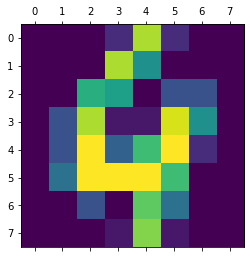

Predicted


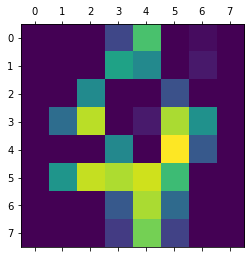

In [7]:

predicted = network.predict(X_test)
print("MSE: " + str(network._mean_squared_error(X_test, predicted)))

print('Observed')
plt.matshow(X_test[26].reshape((8, 8)))
plt.show()

print('Predicted')
plt.matshow(predicted[26].reshape((8, 8)))
plt.show()

# Transcription Factor Classifier

In [2]:
from nn import *
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [3]:
pos_seqs = io.read_text_file('data/rap1-lieb-positives.txt')
neg_seqs = io.read_fasta_file('data/yeast-upstream-1k-negative.fa')

# Sequences
print(len(pos_seqs))
print(len(neg_seqs))

# Sequence lengths  
print(len(neg_seqs[0]))
print(len(pos_seqs[0]))

137
3163
1000
17


In [4]:
# Reference https://stackoverflow.com/questions/13673060/split-string-into-strings-by-length

# NOTE: Model will not train if negative sequences are longer than positive sequences
length = len(pos_seqs[0])
neg_seqs_list = []
for sequence in neg_seqs:
    length_size = len(sequence) // length
    # slide subset window over each negative sequence to match positive sequence length
    neg_seqs_list += [sequence[length * cut:length * (cut + 1)] for cut in range(length_size)]
    

In [5]:
total_seqs = pos_seqs + neg_seqs_list
total_labels = len(pos_seqs)*[0] + len(neg_seqs_list)*[1]

In [6]:
# correct for imbalanced dataset by upsampling the positve class 
total_seqs, total_labels = preprocess.sample_seqs(total_seqs, total_labels) 

In [7]:
X_train, X_test, y_train, y_test= train_test_split(total_seqs, np.array(total_labels), test_size = 0.2, random_state = 26)
X_train = preprocess.one_hot_encode_seqs(X_train)
X_test = preprocess.one_hot_encode_seqs(X_test)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(293275, 68)
(293275,)
(73319, 68)
(73319,)


In [9]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [10]:
# for each layer, the output dimensions are halved 
network = nn.NeuralNetwork([{"input_dim": 68, "output_dim": 34, "activation": "relu"}, 
                            {"input_dim": 34, "output_dim": 17, "activation": "relu"},
                            {"input_dim": 17, "output_dim": 1, "activation": "relu"},], 
                            lr = 0.01, seed = 26, batch_size = 100, epochs = 30, loss_function = "mse")

In [11]:
per_epoch_loss_train, per_epoch_loss_val = network.fit(X_train, y_train, X_test, y_test)

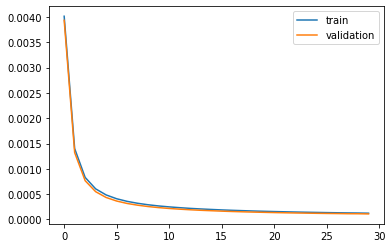

In [12]:
plt.plot(per_epoch_loss_train, label='train')
plt.plot(per_epoch_loss_val, label='validation')
plt.legend()

In [13]:
predicted = network.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,np.round(predicted))) # round to nearest whole number for binary prediction [0,1]

0.9999045267938733


### Hyperparameters
The hyperparameters should be selected by assessing the AUC and reconstruction error over a grid search space- combinations of hyperparameters. 